<a href="https://colab.research.google.com/github/aliostadi/Predict-Bitcoin-Price/blob/main/deep_learning_time_series5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multivariate Single Target multi Step Timeseries

##import packages

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


####https://www.alphavantage.co
####https://twelvedata.com


##import data from API

In [ ]:
pip install twelvedata

     |████████████████████████████████| 42 kB 907 kB/s 


In [ ]:
import requests
def get_crypto_price(symbol, interval,n_interval):
    api_key = '60ddbb6a5141476ea3eb9de19136acc6'
    api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&exchange=binance&interval={interval}&outputsize={n_interval}&apikey={api_key}'
    raw = requests.get(api_url).json()
    df = pd.DataFrame(raw['values']).set_index('datetime')
    # df = pd.DataFrame(raw).set_index('datetime')
    df = df.iloc[::-1]
    return df

dataset = get_crypto_price('BTC/USD', '4h',5000)
dataset

,open,high,low,close
datetime,,,,
2020-01-06 12:00:00,7540.20020,7556.33984,7523.04980,7524.20996
2020-01-06 16:00:00,7517.60010,7559.60010,7511.64990,7539.77979
2020-01-06 20:00:00,7539.54004,7783.45996,7535.20996,7757.18994
2020-01-07 00:00:00,7769.20996,7988.89014,7769.20996,7895.20996
2020-01-07 04:00:00,7901.27979,7904.99023,7831.72998,7883.37012
...,...,...,...,...
2021-10-19 00:00:00,62008.41016,62950.71875,61688.89844,62606.28906
2021-10-19 04:00:00,62634.00000,62812.53125,62006.76172,62318.07031
2021-10-19 08:00:00,62297.05859,62524.92969,61786.64844,62140.98828


##check and fill the missvalues

In [ ]:
dataset.isnull().sum()

open     0
high     0
low      0
close    0
dtype: int64

##plot the multivariate timeseries

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3904 entries, 2020-01-06 12:00:00 to 2021-10-19 16:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    3904 non-null   object
 1   high    3904 non-null   object
 2   low     3904 non-null   object
 3   close   3904 non-null   object
dtypes: object(4)
memory usage: 152.5+ KB


In [ ]:
dataset=dataset.iloc[:,:].astype(float)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3904 entries, 2020-01-06 12:00:00 to 2021-10-19 16:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3904 non-null   float64
 1   high    3904 non-null   float64
 2   low     3904 non-null   float64
 3   close   3904 non-null   float64
dtypes: float64(4)
memory usage: 152.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4222d9e190>,
      dtype=object)

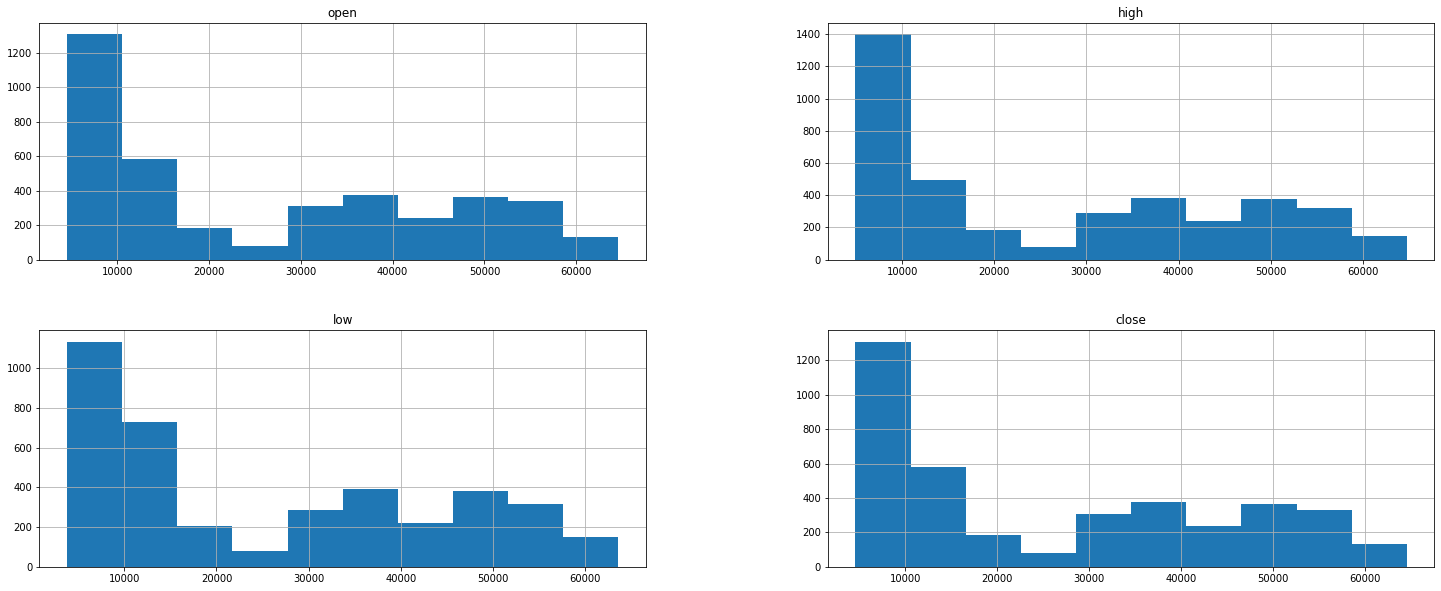

In [ ]:
dataset.hist(figsize=(25,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f42225f6850>,
      dtype=object)

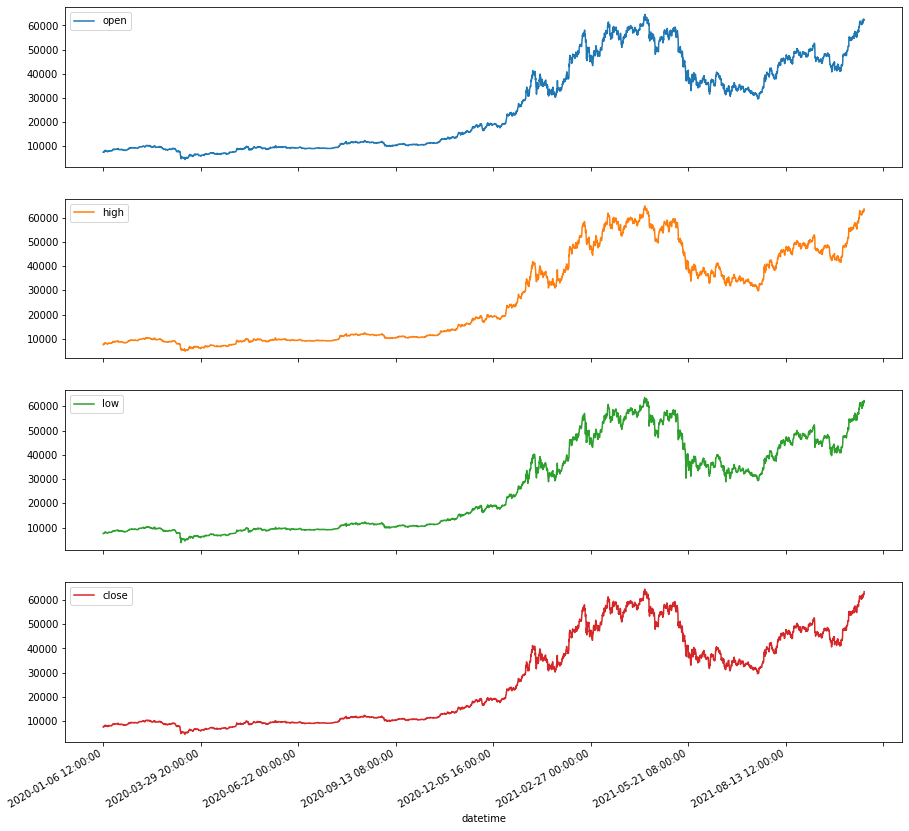

In [ ]:
dataset.plot(subplots=True,figsize=(15,15))

##choose the optimal lag observation

In [ ]:
pip install statsmodels

In [ ]:
import statsmodels.tsa.stattools as sts

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset=pd.DataFrame(dataset)

In [ ]:
sts.adfuller(dataset.close)

(-0.19012601941494697,
 0.9396883809680443,
 27,
 3876,
 {'1%': -3.43203824459253,
  '10%': -2.5671670910000524,
  '5%': -2.8622859739495463},
 60204.447881395725)

In [ ]:
df_diff=dataset.close.diff().dropna()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf 

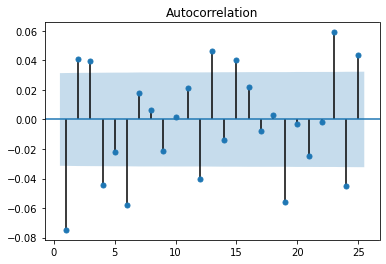

In [ ]:
plot_acf(df_diff, lags=25,zero=False)   
plt.show()

In [ ]:
lag=23

##Split the data

In [ ]:
TRAIN_SPLIT=int(len(dataset)*0.8)

In [ ]:
TRAIN_SPLIT

3123

In [ ]:
dataset=np.array(dataset)

##to supervised

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [ ]:
past_history = lag
STEP = 1
n_step=3

x_train_multi, y_train_multi= multivariate_data(dataset, dataset[:,3], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   n_step, STEP,
                                                   single_step=False)
x_test_multi, y_test_multi = multivariate_data(dataset, dataset[:, 3],
                                               TRAIN_SPLIT, None, past_history,
                                               n_step, STEP,
                                               single_step=False)

In [ ]:
print(x_train_multi.shape)
print(x_test_multi.shape)


(3100, 23, 4)
(755, 23, 4)


In [ ]:
print(y_train_multi.shape)
print(y_test_multi.shape)

(3100, 3)
(755, 3)


##scale data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalers = {}
for i in range(x_train_multi.shape[1]):
    scalers [i]= MinMaxScaler(feature_range=(0,1))
    x_train_multi[:, i, :] = scalers[i].fit_transform(x_train_multi[:, i, :]) 

for i in range(x_test_multi.shape[1]):
    x_test_multi[:, i, :] = scalers[i].transform(x_test_multi[:, i, :]) 

In [ ]:
x_train_multi.shape,x_test_multi.shape

((3100, 23, 4), (755, 23, 4))

In [ ]:
scalers

{0: MinMaxScaler(copy=True, feature_range=(0, 1)),
 1: MinMaxScaler(copy=True, feature_range=(0, 1)),
 2: MinMaxScaler(copy=True, feature_range=(0, 1)),
 3: MinMaxScaler(copy=True, feature_range=(0, 1)),
 4: MinMaxScaler(copy=True, feature_range=(0, 1)),
 5: MinMaxScaler(copy=True, feature_range=(0, 1)),
 6: MinMaxScaler(copy=True, feature_range=(0, 1)),
 7: MinMaxScaler(copy=True, feature_range=(0, 1)),
 8: MinMaxScaler(copy=True, feature_range=(0, 1)),
 9: MinMaxScaler(copy=True, feature_range=(0, 1)),
 10: MinMaxScaler(copy=True, feature_range=(0, 1)),
 11: MinMaxScaler(copy=True, feature_range=(0, 1)),
 12: MinMaxScaler(copy=True, feature_range=(0, 1)),
 13: MinMaxScaler(copy=True, feature_range=(0, 1)),
 14: MinMaxScaler(copy=True, feature_range=(0, 1)),
 15: MinMaxScaler(copy=True, feature_range=(0, 1)),
 16: MinMaxScaler(copy=True, feature_range=(0, 1)),
 17: MinMaxScaler(copy=True, feature_range=(0, 1)),
 18: MinMaxScaler(copy=True, feature_range=(0, 1)),
 19: MinMaxScaler(copy

In [ ]:

scaler_y =MinMaxScaler(feature_range=(0,1))
y_train_multi=scaler_y.fit_transform(y_train_multi)
y_test_multi=scaler_y.transform(y_test_multi)


In [ ]:
y_test_multi.shape,y_train_multi.shape

((755, 3), (3100, 3))

#Simple RNN

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,GRU,SimpleRNN,Conv1D,MaxPooling1D,Flatten , Dropout

In [ ]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(50,input_shape=x_train_multi.shape[-2:],activation='relu',return_sequences=True))
# RNN_model.add(Dropout(0.3))
RNN_model.add(SimpleRNN(50,activation='relu',kernel_regularizer='l2'))
# RNN_model.add(Dropout(0.3))
RNN_model.add(Dense(n_step,activation='selu'))
RNN_model.compile(optimizer='adam', loss='mse')

In [ ]:
history_RNN=RNN_model.fit(x_train_multi,y_train_multi,
                                            epochs=100,batch_size=16,validation_data=(x_test_multi,y_test_multi))

Epoch 1/100
194/194 [==============================] - 3s 9ms/step - loss: 0.2133 - val_loss: 0.0578
Epoch 2/100
194/194 [==============================] - 2s 8ms/step - loss: 0.0257 - val_loss: 0.0104
Epoch 3/100
194/194 [==============================] - 2s 8ms/step - loss: 0.0064 - val_loss: 0.0040
Epoch 4/100
194/194 [==============================] - 2s 8ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 5/100
194/194 [==============================] - 1s 8ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6/100
194/194 [==============================] - 1s 8ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 7/100
194/194 [==============================] - 1s 7ms/step - loss: 9.2892e-04 - val_loss: 7.9288e-04
Epoch 8/100
194/194 [==============================] - 1s 8ms/step - loss: 7.2481e-04 - val_loss: 0.0019
Epoch 9/100
194/194 [==============================] - 1s 8ms/step - loss: 7.3173e-04 - val_loss: 0.0020
Epoch 10/100
194/194 [==============================] - 2s 8ms/step - loss:

##learning curve

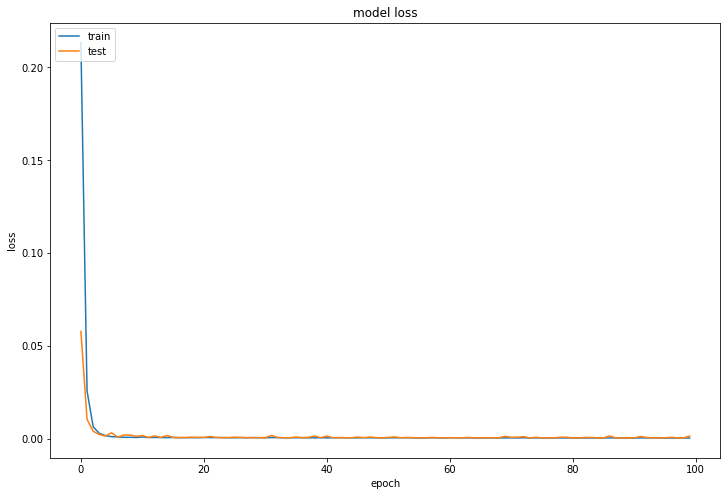

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Predict Test Set

In [ ]:
predict_RNN=RNN_model.predict(x_test_multi)

In [ ]:
predict_RNN.shape

(755, 3)

##MSE

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse_RNN= mean_squared_error(y_test_multi, predict_RNN)

In [ ]:
mse_RNN

0.0012944240395155427

##Inverse Prediction

In [ ]:
predict_RNN_inv=scaler_y.inverse_transform(predict_RNN)
y_test_multi_inv=scaler_y.inverse_transform(y_test_multi)

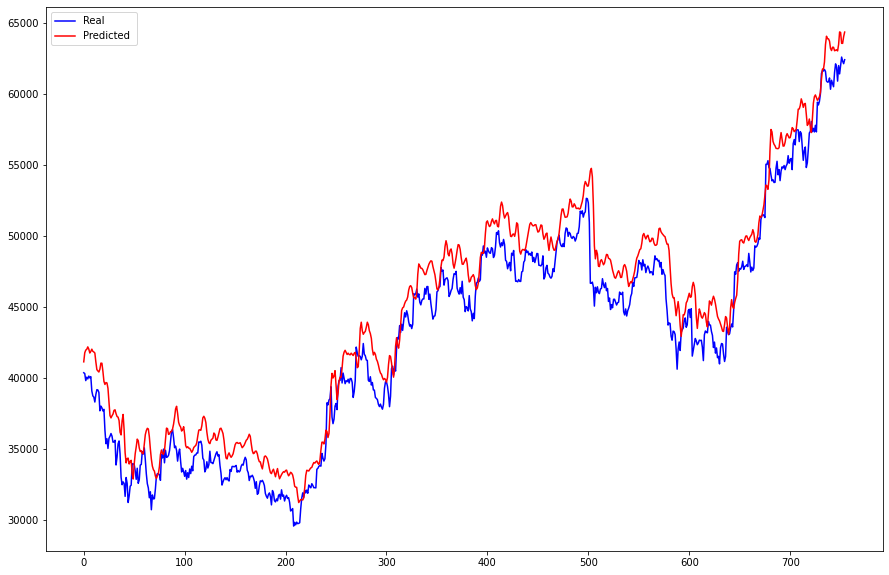

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(y_test_multi_inv[:,2], color='b', label='Real ')
plt.plot(predict_RNN_inv[:,2], color='r', label='Predicted ')
plt.legend()

##predict next step

In [ ]:
input_samples=x_test_multi[-1:,:,:]
input_samples.shape

(1, 23, 4)

In [ ]:
next_step_RNN=RNN_model.predict(input_samples)
next_step_RNN.shape

(1, 3)

In [ ]:
next_step_RNN

array([[1.0064903 , 0.99745655, 0.9974382 ]], dtype=float32)

In [ ]:
next_step_RNN_inv=scaler_y.inverse_transform(next_step_RNN)

In [ ]:
next_step_RNN_inv

array([[64907.023, 64365.52 , 64364.418]], dtype=float32)

#GRU

In [ ]:
GRU_model = Sequential()
GRU_model.add(GRU(50,input_shape=x_train_multi.shape[-2:],activation='relu',return_sequences=True))
# GRU_model.add(Dropout(0.3))
GRU_model.add(GRU(50,activation='relu'))
# GRU_model.add(Dropout(0.3))
GRU_model.add(Dense(n_step,activation='selu'))
GRU_model.compile(optimizer='adam', loss='mse')

In [ ]:
history_GRU=GRU_model.fit(x_train_multi,y_train_multi,
                                            epochs=100,batch_size=16,validation_data=(x_test_multi,y_test_multi))

Epoch 1/100
194/194 [==============================] - 6s 18ms/step - loss: 0.0096 - val_loss: 3.9864e-04
Epoch 2/100
194/194 [==============================] - 3s 17ms/step - loss: 2.9505e-04 - val_loss: 5.6728e-04
Epoch 3/100
194/194 [==============================] - 3s 17ms/step - loss: 2.6948e-04 - val_loss: 5.6147e-04
Epoch 4/100
194/194 [==============================] - 3s 17ms/step - loss: 2.5574e-04 - val_loss: 3.2764e-04
Epoch 5/100
194/194 [==============================] - 3s 17ms/step - loss: 2.6784e-04 - val_loss: 4.2995e-04
Epoch 6/100
194/194 [==============================] - 3s 17ms/step - loss: 2.4737e-04 - val_loss: 3.8087e-04
Epoch 7/100
194/194 [==============================] - 3s 17ms/step - loss: 2.2338e-04 - val_loss: 4.6016e-04
Epoch 8/100
194/194 [==============================] - 3s 17ms/step - loss: 2.5095e-04 - val_loss: 2.8202e-04
Epoch 9/100
194/194 [==============================] - 3s 17ms/step - loss: 2.4071e-04 - val_loss: 2.9829e-04
Epoch 10/100
1

##learning curve

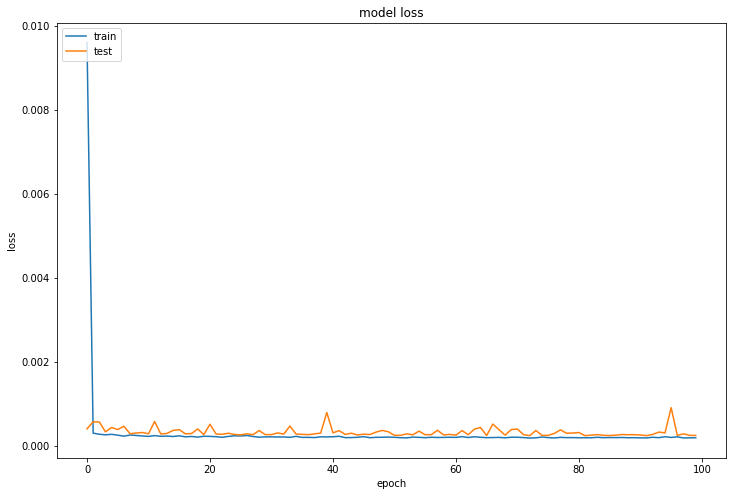

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Predict Test Set

In [ ]:
predict_GRU=GRU_model.predict(x_test_multi)

In [ ]:
predict_GRU.shape

(755, 3)

##MSE

In [ ]:
mse_GRU= mean_squared_error(y_test_multi, predict_GRU)

In [ ]:
mse_GRU

0.00024163771780491867

##Inverse Prediction

In [ ]:
predict_GRU_inv=scaler_y.inverse_transform(predict_GRU)
#y_test_single_inv=scaler.inverse_transform(y_test_single)

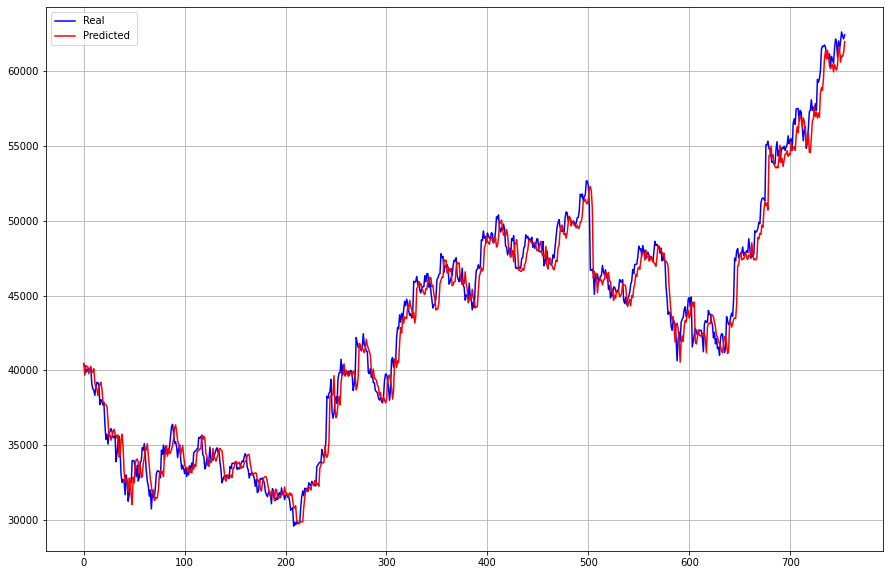

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(y_test_multi_inv[:,2], color='b', label='Real ')
plt.plot(predict_GRU_inv[:,2], color='r', label='Predicted ')
plt.grid()
plt.legend()

##predict next step

In [ ]:
next_step_GRU=GRU_model.predict(input_samples)
next_step_GRU.shape

(1, 3)

In [ ]:
next_step_GRU

array([[0.96466756, 0.9627048 , 0.95731765]], dtype=float32)

In [ ]:
next_step_GRU_inv=scaler_y.inverse_transform(next_step_GRU)

In [ ]:
next_step_GRU_inv

array([[62400.074, 62282.42 , 61959.508]], dtype=float32)

#LSTM

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(50,input_shape=x_train_multi.shape[-2:],activation='relu',return_sequences=True))
# LSTM_model.add(Dropout(0.3))
LSTM_model.add(LSTM(50,activation='relu',return_sequences=True))
# LSTM_model.add(Dropout(0.3))
LSTM_model.add(LSTM(50,activation='relu'))
# LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(n_step,activation='selu'))
LSTM_model.compile(optimizer='adam', loss='mse')

In [ ]:
history_LSTM=LSTM_model.fit(x_train_multi,y_train_multi,
                                            epochs=100,batch_size=16,validation_data=(x_test_multi,y_test_multi))

Epoch 1/100
194/194 [==============================] - 8s 26ms/step - loss: 0.0094 - val_loss: 0.0020
Epoch 2/100
194/194 [==============================] - 5s 24ms/step - loss: 8.2775e-04 - val_loss: 0.0012
Epoch 3/100
194/194 [==============================] - 5s 24ms/step - loss: 8.4724e-04 - val_loss: 0.0018
Epoch 4/100
194/194 [==============================] - 5s 24ms/step - loss: 7.1092e-04 - val_loss: 0.0012
Epoch 5/100
194/194 [==============================] - 5s 24ms/step - loss: 7.6026e-04 - val_loss: 0.0021
Epoch 6/100
194/194 [==============================] - 5s 24ms/step - loss: 9.1331e-04 - val_loss: 9.6348e-04
Epoch 7/100
194/194 [==============================] - 5s 24ms/step - loss: 6.3705e-04 - val_loss: 7.9097e-04
Epoch 8/100
194/194 [==============================] - 5s 24ms/step - loss: 6.5276e-04 - val_loss: 9.7295e-04
Epoch 9/100
194/194 [==============================] - 5s 24ms/step - loss: 5.6202e-04 - val_loss: 9.5085e-04
Epoch 10/100
194/194 [============

##learning curve

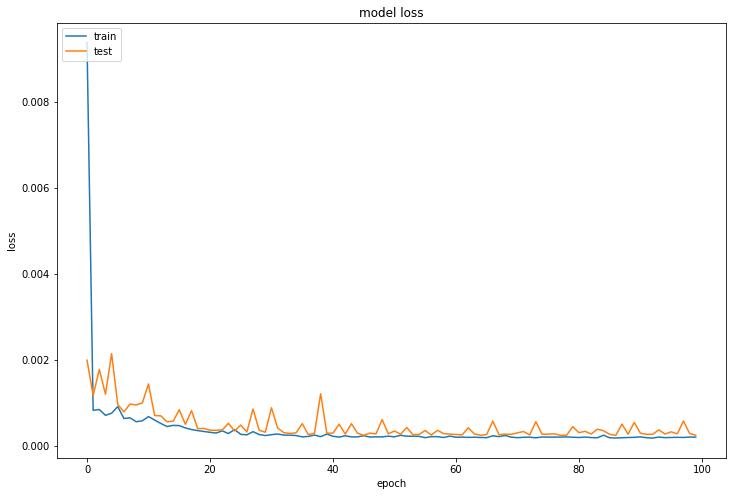

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Predict Test Set

In [ ]:
predict_LSTM=LSTM_model.predict(x_test_multi)

In [ ]:
predict_LSTM.shape

(755, 3)

##MSE

In [ ]:
mse_LSTM= mean_squared_error(y_test_multi, predict_LSTM)

In [ ]:
mse_LSTM

0.00024808352009989795

##Inverse Prediction

In [ ]:
predict_LSTM_inv=scaler_y.inverse_transform(predict_LSTM)
#y_test_single_inv=scaler.inverse_transform(y_test_single)

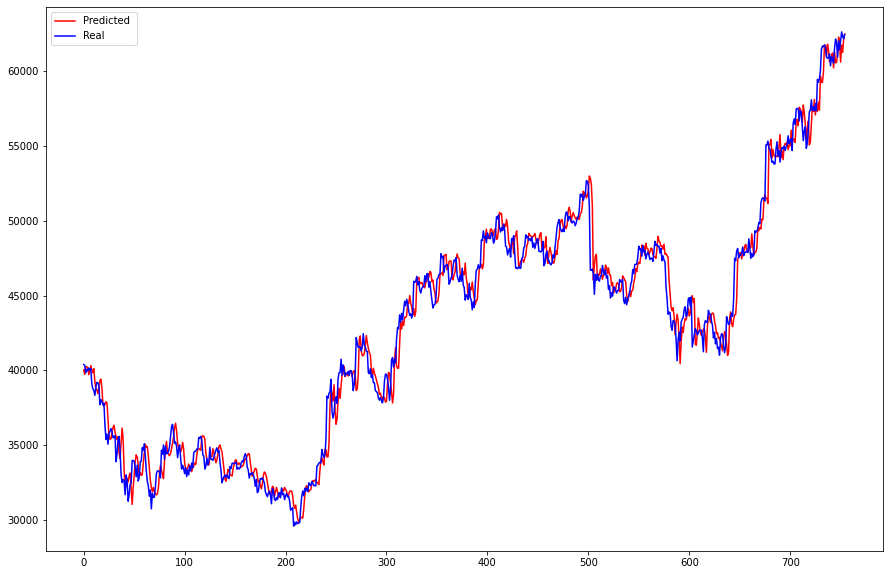

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(predict_LSTM_inv[:,2], color='r', label='Predicted ')
plt.plot(y_test_multi_inv[:,2], color='b', label='Real ')
plt.legend()

##predict next step

In [ ]:
next_step_LSTM=LSTM_model.predict(input_samples)
next_step_LSTM.shape

(1, 3)

In [ ]:
next_step_LSTM

array([[0.9685991 , 0.96699303, 0.96590096]], dtype=float32)

In [ ]:
next_step_LSTM_inv=scaler_y.inverse_transform(next_step_LSTM)

In [ ]:
next_step_LSTM_inv

array([[62635.74 , 62539.473, 62474.01 ]], dtype=float32)

#CNN

In [ ]:
from keras.layers import BatchNormalization

In [ ]:

CNN_model= Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu',input_shape=x_train_multi.shape[-2:]))
#CNN_model.add(Dropout(0.2))
#CNN_model.add(BatchNormalization())
#CNN_model.add(MaxPooling1D(pool_size=2))
# CNN_model.add(BatchNormalization())
# CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# CNN_model.add(Dropout(0.2))
# CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=3))
# CNN_model.add(BatchNormalization())
CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation='relu'))
# CNN_model.add(Dropout(0.2))
# CNN_model.add(BatchNormalization())
CNN_model.add(Dense(n_step,activation='selu'))
CNN_model.compile(loss='mse', optimizer='adam')



In [ ]:
history_CNN=CNN_model.fit(x_train_multi,y_train_multi,
                                            epochs=100,batch_size=16,validation_data=(x_test_multi,y_test_multi))

Epoch 1/100
194/194 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 6.1729e-04 - val_loss: 7.0058e-04
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 6.8212e-04 - val_loss: 6.3890e-04
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 5.1166e-04 - val_loss: 5.7174e-04
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 4.2774e-04 - val_loss: 6.4196e-04
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 3.6922e-04 - val_loss: 6.8882e-04
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 3.5696e-04 - val_loss: 8.7605e-04
Epoch 8/100
194/194 [==============================] - 0s 2ms/step - loss: 4.5349e-04 - val_loss: 6.5744e-04
Epoch 9/100
194/194 [==============================] - 0s 2ms/step - loss: 3.4996e-04 - val_loss: 4.5527e-04
Epoch 10/100
194/194 [=====

##learning curve

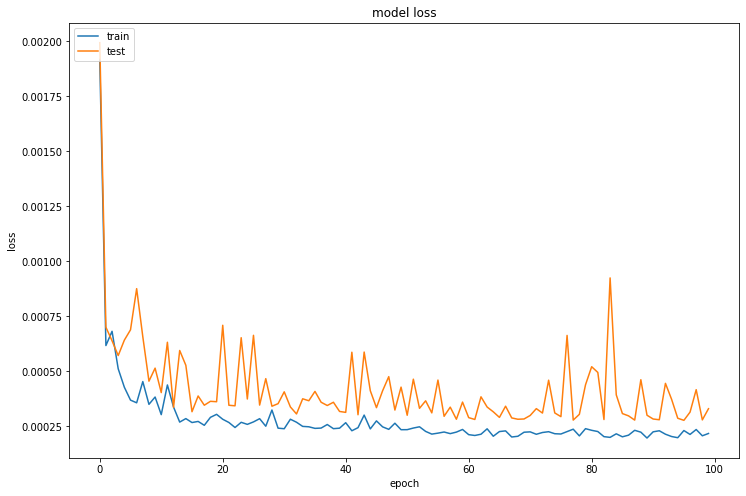

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Predict Test Set

In [ ]:
predict_CNN=CNN_model.predict(x_test_multi)

In [ ]:
predict_CNN.shape

(755, 3)

##MSE

In [ ]:
mse_CNN= mean_squared_error(y_test_multi, predict_CNN)

In [ ]:
mse_CNN

0.0003301314343451018

##Inverse Prediction

In [ ]:
predict_CNN_inv=scaler_y.inverse_transform(predict_CNN)
# y_test_single_inv=scaler.inverse_transform(y_test_single)

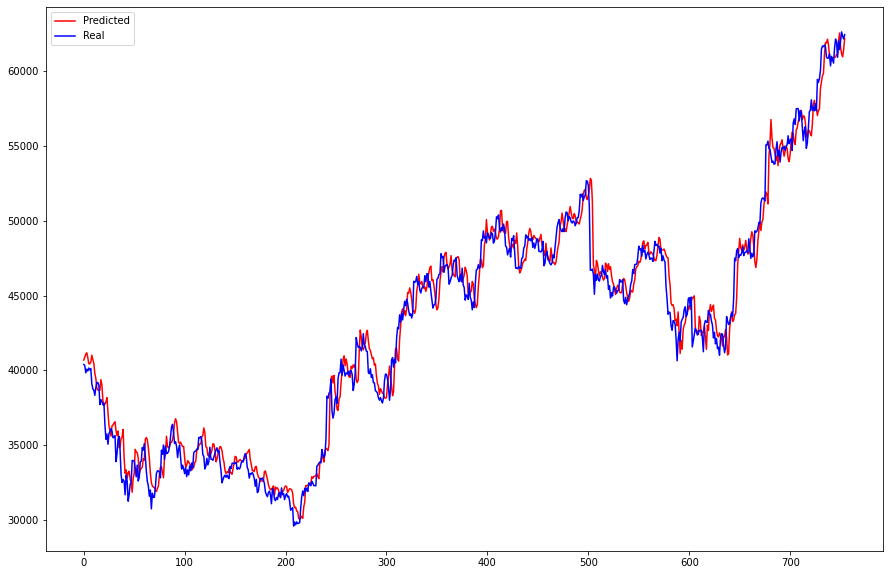

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(predict_CNN_inv[:,2], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:,2], color='b', label='Real')
plt.legend()

##predict next step

In [ ]:
input_samples=x_test_multi[-1:,:,:]
input_samples.shape

(1, 23, 4)

In [ ]:
next_step_CNN=CNN_model.predict(input_samples)
next_step_CNN.shape

(1, 3)

In [ ]:
next_step_CNN

array([[1.0064903 , 0.99745655, 0.9974382 ]], dtype=float32)

In [ ]:
next_step_CNN_inv=scaler_y.inverse_transform(next_step_CNN)

In [ ]:
next_step_CNN_inv

array([[64907.023, 64365.52 , 64364.418]], dtype=float32)

#MLP

In [ ]:
x_train_multi_2d=x_train_multi.reshape(x_train_multi.shape[0],x_train_multi.shape[1]*x_train_multi.shape[2])
x_test_multi_2d=x_test_multi.reshape(x_test_multi.shape[0],x_test_multi.shape[1]*x_test_multi.shape[2])

In [ ]:
MLP_model = Sequential()
MLP_model.add(Dense(100, activation='relu', input_dim=x_train_multi_2d.shape[1]))
MLP_model.add(Dense(60, activation='relu'))
MLP_model.add(Dense(40, activation='relu'))
MLP_model.add(Dense(40, activation='relu'))
MLP_model.add(Dense(40, activation='relu'))
MLP_model.add(Dense(50, activation='relu'))

MLP_model.add(Dense(n_step,activation='selu'))
MLP_model.compile(loss='mse', optimizer='adam')

In [ ]:
history_MLP=MLP_model.fit(x_train_multi_2d,y_train_multi,
                                            epochs=100,batch_size=16,validation_data=(x_test_multi_2d,y_test_multi))

Epoch 1/100
194/194 [==============================] - 1s 2ms/step - loss: 0.0082 - val_loss: 0.0010
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 4.3017e-04 - val_loss: 0.0010
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 6.8923e-04 - val_loss: 5.9017e-04
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 3.7938e-04 - val_loss: 7.7215e-04
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 4.9496e-04 - val_loss: 0.0018
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 4.1096e-04 - val_loss: 9.7369e-04
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 3.8996e-04 - val_loss: 4.1352e-04
Epoch 8/100
194/194 [==============================] - 0s 2ms/step - loss: 4.5592e-04 - val_loss: 5.0939e-04
Epoch 9/100
194/194 [==============================] - 0s 2ms/step - loss: 4.1805e-04 - val_loss: 0.0014
Epoch 10/100
194/194 [=================

##learning curve

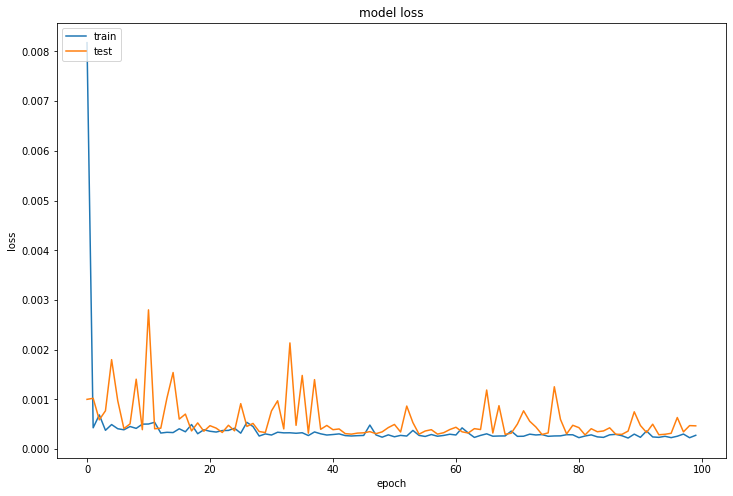

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Predict Test Set

In [ ]:

predict_MLP=MLP_model.predict(x_test_multi_2d)

In [ ]:
predict_MLP.shape

(755, 3)

##MSE

In [ ]:
mse_MLP= mean_squared_error(y_test_multi, predict_MLP)

In [ ]:
mse_MLP

0.0004692620535982049

##Inverse Prediction

In [ ]:
predict_MLP_inv=scaler_y.inverse_transform(predict_MLP)
#y_test_single_inv=scaler.inverse_transform(y_test_single)

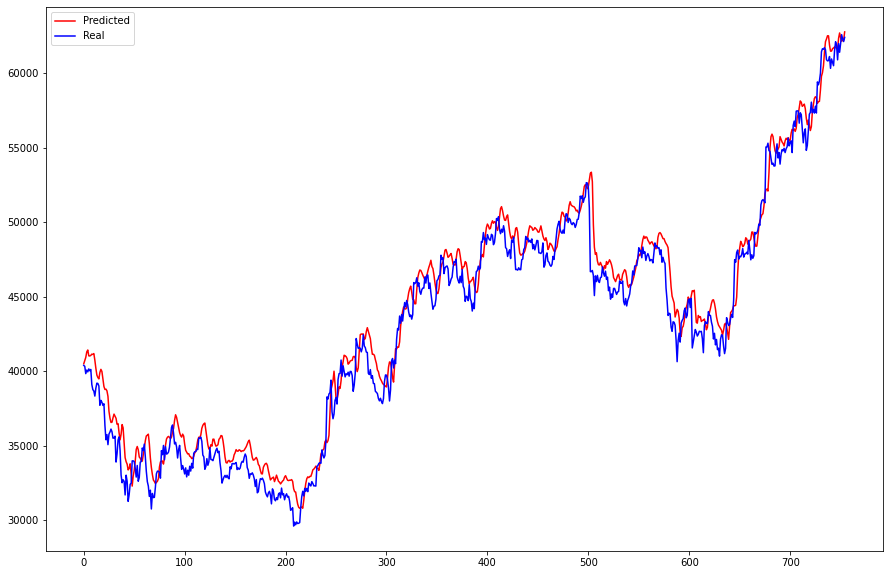

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(predict_MLP_inv[:,2], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:,2], color='b', label='Real')
plt.legend()

##predict next step

In [ ]:
input_samples_MLP=x_test_multi_2d[-1:,:]
input_samples_MLP.shape

(1, 92)

In [ ]:
next_step_MLP=MLP_model.predict(input_samples_MLP)
next_step_MLP.shape

(1, 3)

In [ ]:
next_step_MLP

array([[0.97582245, 0.97067475, 0.97116333]], dtype=float32)

In [ ]:
next_step_MLP_inv=scaler_y.inverse_transform(next_step_MLP)

In [ ]:
next_step_MLP_inv

array([[63068.723, 62760.16 , 62789.45 ]], dtype=float32)

#Result Comparision

In [ ]:
result={'Mlp':mse_MLP,'SimpleRNN':mse_RNN,'GRU':mse_GRU,'LSTM':mse_LSTM,'CNN':mse_CNN}

In [ ]:
result=pd.DataFrame.from_dict(result,orient='index')

In [ ]:
result

,0
Mlp,0.000469
SimpleRNN,0.001294
GRU,0.000242
LSTM,0.000248
CNN,0.000330


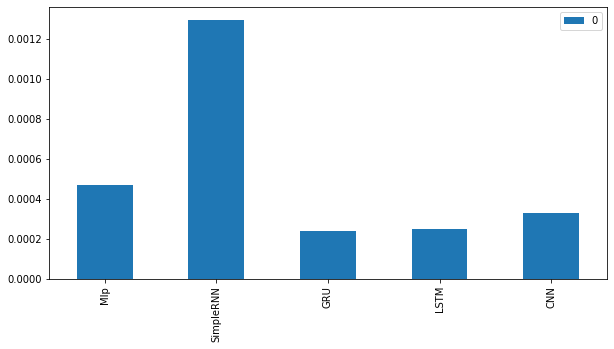

In [ ]:
result.plot(kind='bar',figsize=(10,5))